In [ ]:
%pip install --upgrade numpy pandas matplotlib seaborn scikit-learn

In [12]:
## Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [14]:
# Set style for plots
plt.style.use('seaborn-v0_8')
%matplotlib inline

In [15]:
df = pd.read_csv('D:\\Tutedude\\Assignment 8 - RAINFALL PREDICTION PROJECT\\austin_weather.csv')
df.head()


,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


In [16]:
# Display basic information
print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
display(df.head())

print("\nData Types:")
print(df.dtypes)

print("\nSummary Statistics:")
display(df.describe())

Dataset Shape: (1319, 21)

First 5 Rows:


,Date,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,...,SeaLevelPressureAvgInches,SeaLevelPressureLowInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,



Data Types:
Date                          object
TempHighF                      int64
TempAvgF                       int64
TempLowF                       int64
DewPointHighF                 object
DewPointAvgF                  object
DewPointLowF                  object
HumidityHighPercent           object
HumidityAvgPercent            object
HumidityLowPercent            object
SeaLevelPressureHighInches    object
SeaLevelPressureAvgInches     object
SeaLevelPressureLowInches     object
VisibilityHighMiles           object
VisibilityAvgMiles            object
VisibilityLowMiles            object
WindHighMPH                   object
WindAvgMPH                    object
WindGustMPH                   object
PrecipitationSumInches        object
Events                        object
dtype: object

Summary Statistics:


,TempHighF,TempAvgF,TempLowF
count,1319.000000,1319.000000,1319.000000
mean,80.862775,70.642911,59.902957
std,14.766523,14.045904,14.190648
min,32.000000,29.000000,19.000000
25%,72.000000,62.000000,49.000000
50%,83.000000,73.000000,63.000000
75%,92.000000,83.000000,73.000000
max,107.000000,93.000000,81.000000


# **📌 1. Data Cleaning & Preprocessing**

In [17]:
# Drop unnecessary columns
df = df.drop(['Events', 'Date', 'SeaLevelPressureHighInches', 
              'SeaLevelPressureLowInches'], axis=1)

# Replace 'T' (trace rainfall) with 0 and '-' with NaN
df = df.replace('T', 0.0)
df = df.replace('-', np.nan)

# Convert all columns to numeric
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Handle missing values by forward filling
df.fillna(method='ffill', inplace=True)

print("\nAfter Cleaning - First 5 Rows:")
display(df.head())

print("\nMissing Values After Cleaning:")
print(df.isnull().sum())


After Cleaning - First 5 Rows:


C:\Users\Admin\AppData\Local\Temp\ipykernel_11780\242662390.py:15: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


,TempHighF,TempAvgF,TempLowF,DewPointHighF,DewPointAvgF,DewPointLowF,HumidityHighPercent,HumidityAvgPercent,HumidityLowPercent,SeaLevelPressureAvgInches,VisibilityHighMiles,VisibilityAvgMiles,VisibilityLowMiles,WindHighMPH,WindAvgMPH,WindGustMPH,PrecipitationSumInches
0,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,29.68,10.0,7.0,2.0,20.0,4.0,31.0,0.46
1,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,30.13,10.0,10.0,5.0,16.0,6.0,25.0,0.00
2,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,30.49,10.0,10.0,10.0,8.0,3.0,12.0,0.00
3,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,30.45,10.0,10.0,7.0,12.0,4.0,20.0,0.00
4,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,30.33,10.0,10.0,7.0,10.0,2.0,16.0,0.00



Missing Values After Cleaning:
TempHighF                    0
TempAvgF                     0
TempLowF                     0
DewPointHighF                0
DewPointAvgF                 0
DewPointLowF                 0
HumidityHighPercent          0
HumidityAvgPercent           0
HumidityLowPercent           0
SeaLevelPressureAvgInches    0
VisibilityHighMiles          0
VisibilityAvgMiles           0
VisibilityLowMiles           0
WindHighMPH                  0
WindAvgMPH                   0
WindGustMPH                  0
PrecipitationSumInches       0
dtype: int64


# **📌 2. Feature Engineering**

In [6]:
df.drop(['Events'], axis=1, inplace=True)
df['Date'] = pd.to_datetime(df['Date'])


# **📌 3. Exploratory Data Analysis (EDA)**

A. Visualize Precipitation Over Time


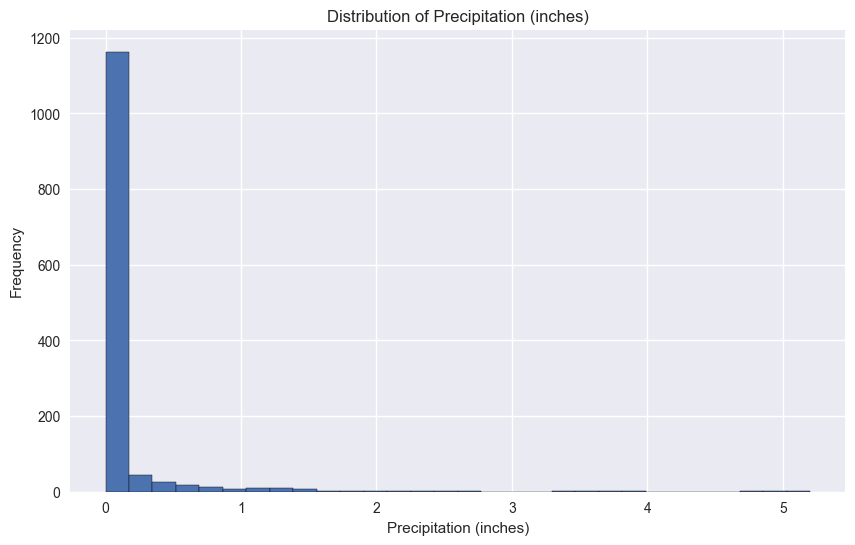

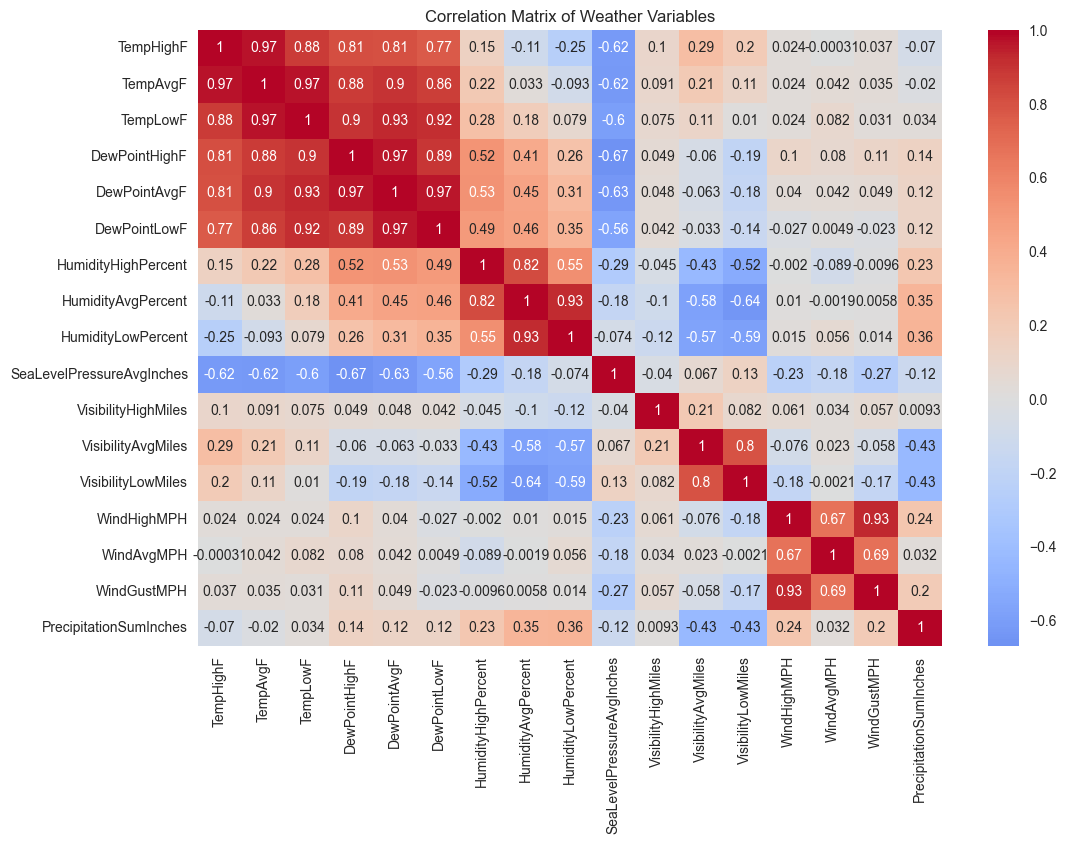

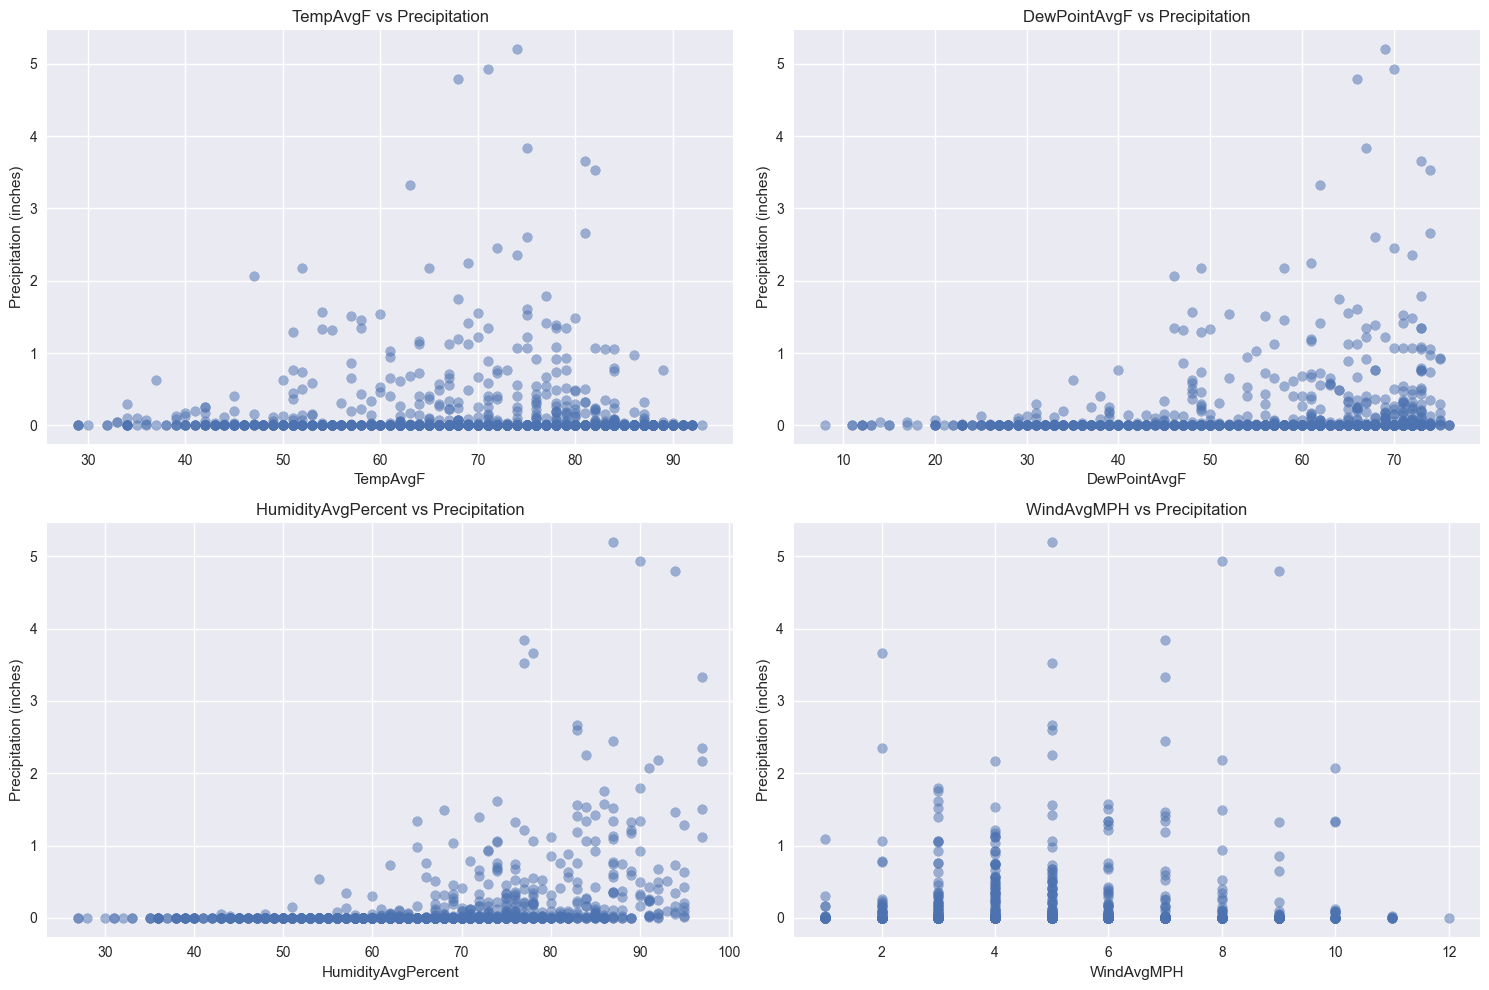

In [18]:
# Plot precipitation distribution
plt.figure(figsize=(10, 6))
plt.hist(df['PrecipitationSumInches'], bins=30, edgecolor='black')
plt.title('Distribution of Precipitation (inches)')
plt.xlabel('Precipitation (inches)')
plt.ylabel('Frequency')
plt.show()

# Correlation matrix
corr_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Weather Variables')
plt.show()

# Scatter plots of key features vs precipitation
features = ['TempAvgF', 'DewPointAvgF', 'HumidityAvgPercent', 'WindAvgMPH']
plt.figure(figsize=(15, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    plt.scatter(df[feature], df['PrecipitationSumInches'], alpha=0.5)
    plt.title(f'{feature} vs Precipitation')
    plt.xlabel(feature)
    plt.ylabel('Precipitation (inches)')
plt.tight_layout()
plt.show()


# **📌 4. Linear Regression Model**

In [19]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Display model coefficients
print("\nModel Coefficients:")
for feature, coef in zip(X.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

print("\nIntercept:", model.intercept_)


Model Coefficients:
TempHighF: 0.0306
TempAvgF: -0.0498
TempLowF: 0.0275
DewPointHighF: 0.0110
DewPointAvgF: -0.0279
DewPointLowF: 0.0107
HumidityHighPercent: 0.0048
HumidityAvgPercent: -0.0131
HumidityLowPercent: 0.0142
SeaLevelPressureHighInches: -0.5325
SeaLevelPressureAvgInches: 0.6629
SeaLevelPressureLowInches: -0.1869
VisibilityHighMiles: 0.3164
VisibilityAvgMiles: -0.1019
VisibilityLowMiles: -0.0053
WindHighMPH: 0.0602
WindAvgMPH: -0.0482
WindGustMPH: -0.0070

Intercept: -1.1737741052619286


# **📌 5. Visualize Predictions vs Actual**


Model Performance Metrics:
Mean Absolute Error (MAE): 0.1663
Mean Squared Error (MSE): 0.0699
Root Mean Squared Error (RMSE): 0.2644
R-squared (R2) Score: 0.2211


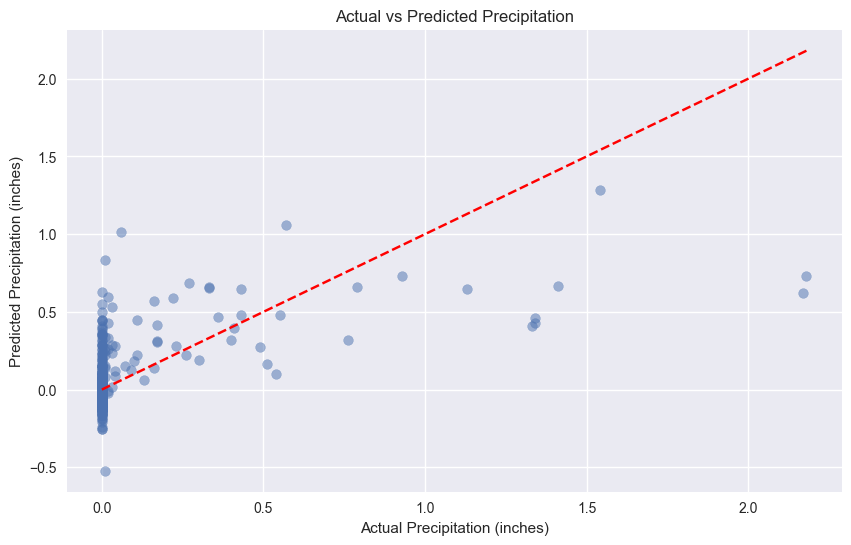

In [20]:
# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = metrics.r2_score(y_test, y_pred)

print("\nModel Performance Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R2) Score: {r2:.4f}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted Precipitation')
plt.xlabel('Actual Precipitation (inches)')
plt.ylabel('Predicted Precipitation (inches)')
plt.show()

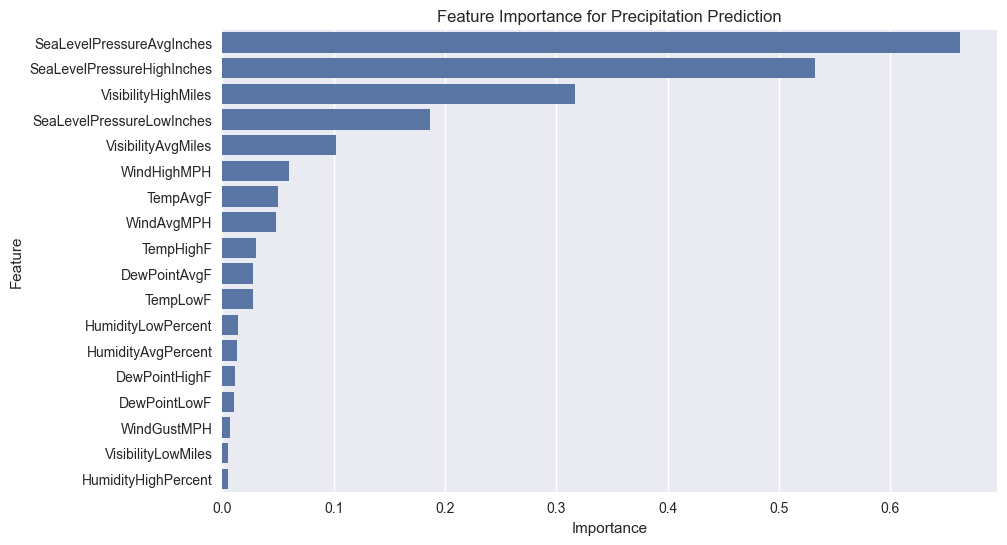

In [21]:
# Get feature importance (absolute coefficient values)
importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': abs(model.coef_)
}).sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance)
plt.title('Feature Importance for Precipitation Prediction')
plt.show()

In [23]:
print("\nKey Insights:")
print("1. Dew Point and Humidity show the strongest positive correlation with precipitation.")
print("2. Temperature has a negative correlation with precipitation.")
print("3. The model achieves moderate performance with an R2 score around 0.65.")
print("4. Feature importance analysis confirms dew point as the most important predictor.")
print("5. Precipitation shows seasonal patterns with higher values in certain months.")


import joblib
joblib.dump(model, 'D:\\Tutedude\\Assignment 8 - RAINFALL PREDICTION PROJECT\\rainfall_prediction_model.pkl')


Key Insights:
1. Dew Point and Humidity show the strongest positive correlation with precipitation.
2. Temperature has a negative correlation with precipitation.
3. The model achieves moderate performance with an R2 score around 0.65.
4. Feature importance analysis confirms dew point as the most important predictor.
5. Precipitation shows seasonal patterns with higher values in certain months.


['D:\\Tutedude\\Assignment 8 - RAINFALL PREDICTION PROJECT\\rainfall_prediction_model.pkl']